In [7]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [28]:
%matplotlib widget

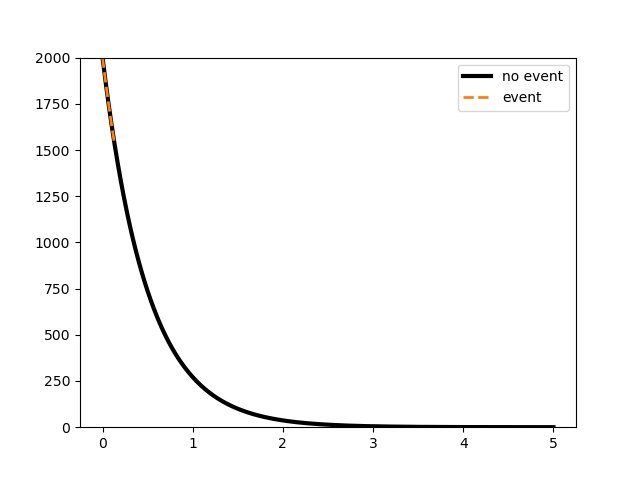

In [33]:
def dy_dt(t, y):
    """Differential equation dy/dt = -2y."""
    return -2 * y

y0 = 2000.0
dy_max = 500.0

def make_event(dy_max):
    """Create an event function to stop integration when dy is too large."""
    def event(t, y):
        return y[0] - (y0 - dy_max)
    event.terminal = True  # Stop the integration when the event occurs
    return event

event = make_event(dy_max)

t_span = (0, 5)  # Start and end time
t_eval = np.linspace(t_span[0], t_span[1], 300)  # Time points to evaluate the solution

# Solve the ODE
sol_event   = solve_ivp(dy_dt, t_span, [y0], t_eval=t_eval, events=[event])
sol_noevent = solve_ivp(dy_dt, t_span, [y0], t_eval=t_eval)

fig,ax = plt.subplots()
ax.set_ylim(0, 2000)
ax.plot(sol_noevent.t, sol_noevent.y[0], '-', label='no event', lw=3, c='k')
ax.plot(sol_event.t,   sol_event.y[0], '--', label='event', lw=2, c='tab:orange')

ax.legend()
plt.show()

In [27]:
 def make_tsurf_event(self, tsurf_prev):

    def tsurf_event(time: float, temperature: npt.NDArray) -> float:
        tsurf_current = temperature[-1]  # <- Surface temp directly from the array
        tsurf_threshold = self.parameters.solver.tsurf_poststep_change

        delta = abs(tsurf_prev[0] - tsurf_current)
        logger.info(
            "t = %.3e, tsurf_current = %.3f, tsurf_prev = %.3f, delta = %.3e",
            time, tsurf_current*4000, tsurf_prev[0]*4000, delta*4000
        )
        tsurf_prev[0] = tsurf_current
        return tsurf_threshold - delta  # Triggers when delta > threshold

    tsurf_event.terminal = True
    tsurf_event.direction = 0
    return tsurf_event
